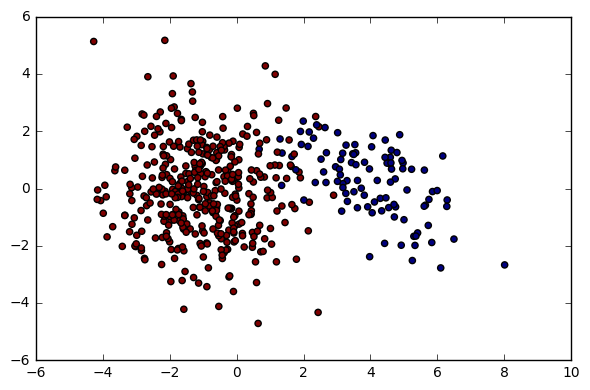

In [30]:
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.datasets import make_classification
from sklearn.decomposition import PCA

# Generate the dataset
X, y = make_classification(n_classes=2, class_sep=2, weights=[0.2, 0.8],
                           n_informative=3, n_redundant=1, flip_y=0,
                           n_features=20, n_clusters_per_class=1,
                           n_samples=500, random_state=10)
# pca for 2d-plot
pca = PCA(n_components=2)
X_vis = pca.fit_transform(X)
plt.scatter(X_vis[:, 0], X_vis[:, 1], c=y)
plt.tight_layout()
plt.savefig('./pic/datasets.png', dpi=300, bbox_inches='tight')
plt.show()

In [1]:
from imblearn import under_sampling as us
from imblearn import over_sampling as os
from imblearn import combine
from imblearn import pipeline as pl
from imblearn.metrics import classification_report_imbalanced
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import FunctionTransformer
from sklearn.model_selection import cross_val_score
import numpy as np

# Generate the datasets
X, y = make_classification(n_classes=2, class_sep=2, weights=[0.2, 0.8],
                           n_informative=3, n_redundant=1, flip_y=0,
                           n_features=20, n_clusters_per_class=1,
                           n_samples=500, random_state=10)
# classifier
clf = LogisticRegression()
filters = {'Original': FunctionTransformer(),  # 恒等写像
           'ENN': us.EditedNearestNeighbours(),
           'Tomek': us.TomekLinks(),
           'ClusterCentroids': us.ClusterCentroids(),
           'RandomUnderSampling': us.RandomUnderSampler(),
           'SMOTE': os.SMOTE(),
           'ADASYN': os.ADASYN(),
           'RandomOverSampling': os.RandomOverSampler(),
           'SMOTEENN': combine.SMOTEENN(),
           'SMOTETomek': combine.SMOTETomek()
           }
# Scoring
for idx, val in filters.items():
    pipeline = pl.make_pipeline(val, clf)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    score = np.mean(cross_val_score(pipeline, X_train, y_train, cv=3, scoring='roc_auc'))
    pipeline.fit(X_train, y_train)
    y_pred_bal = pipeline.predict(X_test)
    print(idx)
    print('roc_auc: {}'.format(score))
    print(classification_report_imbalanced(y_test, y_pred_bal))
# geoもibaもcvした方がいいけど面倒

SMOTE
roc_auc: 0.9915859449192782
                   pre       rec       spe        f1       geo       iba       sup

          0       0.92      1.00      0.97      0.96      0.99      0.98        24
          1       1.00      0.97      1.00      0.99      0.99      0.97        76

avg / total       0.98      0.98      0.99      0.98      0.99      0.97       100

RandomUnderSampling
roc_auc: 0.9933565131942844
                   pre       rec       spe        f1       geo       iba       sup

          0       0.82      0.90      0.95      0.86      0.92      0.85        20
          1       0.97      0.95      0.90      0.96      0.92      0.86        80

avg / total       0.94      0.94      0.91      0.94      0.92      0.86       100

SMOTEENN
roc_auc: 0.9938770756380819
                   pre       rec       spe        f1       geo       iba       sup

          0       0.82      1.00      0.95      0.90      0.98      0.96        18
          1       1.00      0.95      1.00  